In [ ]:
!pip install nltk
!pip install gensim
!pip install spacy
!pip install plotly

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

In [ ]:
df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'])
df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])

In [5]:
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
def remove_punc(x):
  return re.sub('[!#?,.:";]', '', x)

In [7]:
df = pd.DataFrame()
df['french'] = list(df_french['french'])
df['english'] = list(df_english['english'])

In [8]:
df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

In [9]:
df.head(2)

,french,english
0,new jersey est parfois calme pendant l' automn...,new jersey is sometimes quiet during autumn a...
1,les états-unis est généralement froid en juill...,the united states is usually chilly during jul...


In [10]:
english_words = 199
french_words  = 350

In [11]:
# Obtain list of all words in the dataset
words = []
for i in df['english']:
  for word in i.split():
    words.append(word)
    
words[:5]

['new', 'jersey', 'is', 'sometimes', 'quiet']

In [12]:
# Obtain the total count of words
english_words_counts = Counter(words)
english_words_counts

Counter({'a': 1944,
         'am': 24,
         'and': 59850,
         'animal': 2304,
         'animals': 768,
         'apple': 4848,
         'apples': 5844,
         'april': 8954,
         'are': 870,
         "aren't": 36,
         'august': 8789,
         'automobile': 1944,
         'autumn': 9004,
         'banana': 4848,
         'bananas': 5844,
         'bear': 192,
         'bears': 64,
         'beautiful': 8915,
         'been': 36,
         'between': 540,
         'big': 1016,
         'bird': 192,
         'birds': 64,
         'black': 972,
         'blue': 972,
         'busy': 8791,
         'but': 63987,
         'california': 11250,
         'car': 1944,
         'cat': 192,
         'cats': 64,
         'chilly': 8770,
         'china': 10953,
         'chinese': 312,
         'cold': 8878,
         'december': 8945,
         'did': 204,
         "didn't": 60,
         'difficult': 260,
         'dislike': 4444,
         'disliked': 648,
         'dislikes': 731

In [13]:
# sort the dictionary by values
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [14]:
english_words_counts[:5]

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628)]

In [15]:
# append the values to a list for visualization purposes
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
  english_words.append(english_words_counts[i][0])
  english_counts.append(english_words_counts[i][1])

In [16]:
english_words[:5]

['is', 'in', 'it', 'during', 'the']

In [17]:
english_counts[:5]

[205858, 75525, 75137, 74933, 67628]

In [18]:
# Plot barplot using plotly 
fig = px.bar(x = english_words, y = english_counts)
fig.show()

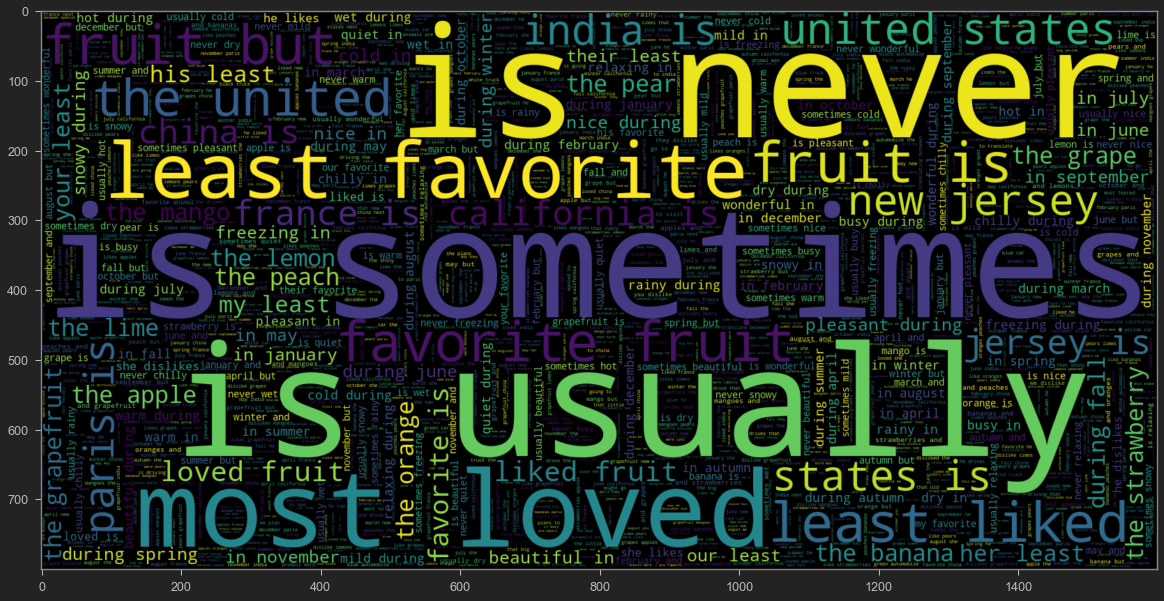

In [ ]:
# plot the word cloud for english text
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
df.english[0]
nltk.word_tokenize(df.english[0])

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april']

In [19]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_english = -1
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("The maximum number of words in any document = ", maxlen_english)

The maximum number of words in any document =  15


In [21]:
# Obtain list of all words in the dataset
words = []
for i in df['french']:
  for word in i.split():
    words.append(word)
    
words[:5]

['new', 'jersey', 'est', 'parfois', 'calme']

In [22]:
french_words_counts = Counter(words)
french_words_counts

Counter({'-': 328,
         '-ce': 95,
         '-elle': 24,
         '-il': 36,
         '-ils': 26,
         'a': 1356,
         'agréable': 17751,
         'aimait': 707,
         'aime': 8870,
         'aiment': 1116,
         'aiment-ils': 10,
         'aimeraient': 12,
         'aimez': 1053,
         'aimons': 1111,
         'aimé': 25852,
         'aimée': 105,
         'aimés': 237,
         'aller': 1180,
         'allez': 45,
         'allions': 1,
         'allons': 45,
         'allé': 187,
         'allée': 150,
         'allés': 150,
         'amusant': 260,
         'anglais': 312,
         'animal': 2248,
         'animaux': 768,
         'août': 8789,
         'apprécié': 2,
         'as-tu': 1,
         'at': 32,
         'au': 25738,
         'automne': 14727,
         'automobile': 278,
         'aux': 392,
         'avez': 162,
         'avons': 19,
         'avril': 8954,
         'banane': 4848,
         'bananes': 5844,
         'beau': 6387,
         'belle': 

In [23]:
# sort the dictionary by values
french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [24]:
french_words = []
french_counts = []
for i in range(len(french_words_counts)):
  french_words.append(french_words_counts[i][0])
  french_counts.append(french_words_counts[i][1])

In [25]:
fig = px.bar(x = french_words, y = french_counts)
fig.show()

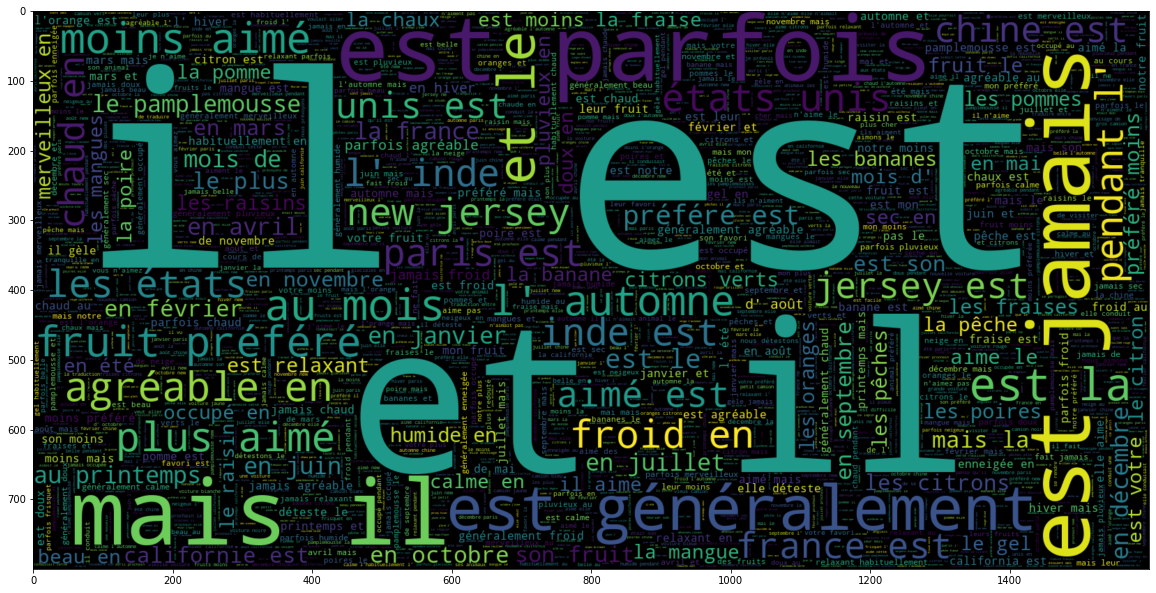

In [26]:
# plot the word cloud for french text
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.french))
plt.imshow(wc, interpolation = 'bilinear')

In [27]:
maxlen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("The maximum number of words in any document = ", maxlen_french)

The maximum number of words in any document =  23


In [28]:
def tokenize_and_pad(x, maxlen):
  #  a tokenier to tokenize the words and create sequences of tokenized words
  tokenizer = Tokenizer(char_level = False)
  tokenizer.fit_on_texts(x)
  sequences = tokenizer.texts_to_sequences(x)
  padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')
  return tokenizer, sequences, padded

In [45]:
# tokenize and padding to the data 
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_french)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french)

In [46]:
# Total vocab size, since we added padding we add 1 to the total word count
english_vocab_size = 199 + 1
print("Complete English Vocab Size:", english_vocab_size)

Complete English Vocab Size: 200


In [39]:
# Total vocab size, since we added padding we add 1 to the total word count
french_vocab_size = 350 + 1
print("Complete French Vocab Size:", french_vocab_size)

Complete French Vocab Size: 351


In [47]:
print("The tokenized version for document\n", df.english[-1:].item(),"\n is : ", x_padded[-1:])

The tokenized version for document
 the orange is her favorite fruit  but the banana is your favorite  
 is :  [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0  0  0  0  0  0  0  0  0]]


In [41]:
print("The tokenized version for document\n", df.french[-1:].item(),"\n is : ", y_padded[-1:])

The tokenized version for document
 l'orange est son fruit préféré  mais la banane est votre favori  
 is :  [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0]]


In [42]:
# function to obtain the text from padded variables
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [43]:
pad_to_text(y_padded[0], y_tokenizer)

"new jersey est parfois calme pendant l' automne et il est neigeux en avril         "

In [44]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

In [48]:
# Sequential Model
model = Sequential()
# embedding layer
model.add(Embedding(english_vocab_size, 256, input_length = maxlen_english, mask_zero = True))
# encoder
model.add(LSTM(256))
# decoder
# repeatvector repeats the input for the desired number of times to change
# 2D-array to 3D array. For example: (1,256) to (1,23,256)
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences= True ))
model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 256)           51200     
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 23, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 23, 256)           525312    
_________________________________________________________________
time_distributed (TimeDistri (None, 23, 351)           90207     
Total params: 1,192,031
Trainable params: 1,192,031
Non-trainable params: 0
_________________________________________________________________


In [49]:
# change the shape of target from 2D to 3D
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 23, 1)

In [50]:
# train the model
model.fit(x_train, y_train, batch_size=1024, validation_split= 0.1, epochs=10)

Epoch 1/10
110/110 [==============================] - 10s 95ms/step - loss: 2.6913 - accuracy: 0.4967 - val_loss: 2.1146 - val_accuracy: 0.5467
Epoch 2/10
110/110 [==============================] - 9s 83ms/step - loss: 1.9177 - accuracy: 0.5712 - val_loss: 1.6490 - val_accuracy: 0.5998
Epoch 3/10
110/110 [==============================] - 9s 85ms/step - loss: 1.5265 - accuracy: 0.6139 - val_loss: 1.4071 - val_accuracy: 0.6398
Epoch 4/10
110/110 [==============================] - 9s 85ms/step - loss: 1.3361 - accuracy: 0.6486 - val_loss: 1.2375 - val_accuracy: 0.6680
Epoch 5/10
110/110 [==============================] - 9s 86ms/step - loss: 1.1730 - accuracy: 0.6783 - val_loss: 1.1136 - val_accuracy: 0.6911
Epoch 6/10
110/110 [==============================] - 10s 88ms/step - loss: 1.0121 - accuracy: 0.7162 - val_loss: 1.0815 - val_accuracy: 0.7024
Epoch 7/10
110/110 [==============================] - 10s 89ms/step - loss: 0.8944 - accuracy: 0.7458 - val_loss: 0.9178 - val_accuracy: 0.7

In [51]:
# save the model
model.save("weights.h5")

In [52]:
# function to make prediction
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [53]:
for i in range(5):

  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - her least favorite animals are dogs         

Original French word - ses animaux les moins préférés sont des chiens               

Predicted French word - ses animaux sont sont moins moins moins                




Original English word - he likes apples and lemons          

Original French word - il aime les pommes et les citrons                

Predicted French word - il aime les les et les citrons                




Original English word - the united states is sometimes freezing during october and it is busy in march 

Original French word - les états unis est parfois glaciales en octobre et il est occupé en mars         

Predicted French word - les états unis est parfois gel en février et il est en en mars         




Original English word - she is going to france next may        

Original French word - elle va en france en mai prochain                

Predicted French word - elle va aller en en mai prochain                




Original English word 